<div style="text-align: center;">
    <img src="OneDrive/Bureau/Data Science netflix Project/616QXs8yg0L.png" alt="Netflix Logo" style="width: 400px;">
</div>


<h1 style = "text-align : center; color : red;"><title> Analyzing Netflix Data: Trends, Insights, and Predictive Modeling  </title></h1>

# Introduction 
In this project, we explore a comprehensive netflix dataset from IMDb, containing information about various films and TV shows, including their ratings, popularity, genres, and more. The goal is to uncover patterns and trends within the data, build predictive models, and create insightful visualizations. This analysis will serve as a valuable addition to a data science portfolio, showcasing skills in data preprocessing, exploratory data analysis, and machine learning.



# Project Plan
## 1. Data Exploration

- **Understading the data** Discover the data and some insights .

## 2. Data Preprocessing

- **Handle missing values** in columns such as 'certificate', 'startYear', 'endYear', 'episodes', etc.
- **Convert data types** where necessary (e.g., 'runtime' might need to be converted from string to numeric).
- **Extract features** like the year from 'startYear' for time-based analysis.

## 3. Exploratory Data Analysis (EDA)

- **Visualize** the distribution of ratings, genres, and popular ranks.
- **Analyze** the relationship between different variables (e.g., rating vs. number of votes, genres vs. popular rank).
- **Explore trends over time**, such as changes in average ratings or the number of episodes.

## 4.Encoding categorical Variabels
- **Identify** Categorical Variables 
- **Choose Encoding Methods** : 
- Label Encoding: Use sklearn.preprocessing.LabelEncoder for ordinal categories.
- One-Hot Encoding: Use pandas.get_dummies() or sklearn.preprocessing.OneHotEncoder for nominal categories.
- Frequency Encoding: Replace categories with their counts.



## 5. Machine Learning

- **Implement models** to predict the rating of a movie or TV show based on the other features in the dataset.
- **Compare the performance** of different models, such as Linear Regression, Random Forest, and XGBoost.
- **Evaluate model performance** using metrics like RMSE, MAE, and R².



# 1.Data Exploration

In [46]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

path =  "OneDrive/Bureau\Data Science netflix Project/netflix_list.csv"
data = pd.read_csv(path)
data.head()

,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,isAdult,cast,image_url
0,tt4052886,Lucifer,1,15,2016.0,NaN,93.0,42,tvSeries,United States,English,Lucifer Morningstar has decided he's had enoug...,"Lucifer Morningstar, bored from his sulking li...",8.1,250884.0,"Crime,Drama,Fantasy",0,"['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra...",https://m.media-amazon.com/images/M/MV5BNzY1Yj...
1,tt0993840,Army of the Dead,2,18,2021.0,NaN,NaN,148,movie,United States,English,"Following a zombie outbreak in Las Vegas, a gr...","With the abandoned, walled city of Las Vegas o...",5.8,110780.0,"Action,Crime,Horror",0,"['Dave Bautista', 'Ella Purnell', 'Ana de la R...",https://m.media-amazon.com/images/M/MV5BNGY0Nz...
2,tt7255502,The Kominsky Method,3,18,2018.0,2021.0,22.0,30,tvSeries,United States,English,"An aging actor, who long ago enjoyed a brush w...",Michael Douglas plays an actor who made it big...,8.2,28795.0,"Comedy,Drama",0,"['Michael Douglas', 'Sarah Baker', 'Graham Rog...",https://m.media-amazon.com/images/M/MV5BMzA0YT...
3,tt0108778,Friends,4,13+,1994.0,2004.0,235.0,22,tvSeries,United States,English,Follows the personal and professional lives of...,"Ross Geller, Rachel Green, Monica Geller, Joey...",8.9,861843.0,"Comedy,Romance",0,"['Jennifer Aniston', 'Courteney Cox', 'Lisa Ku...",https://m.media-amazon.com/images/M/MV5BNDVkYj...
4,tt9251798,Ragnarok,5,18,2020.0,NaN,12.0,45,tvSeries,Norway,Norwegian,A small Norwegian town experiencing warm winte...,In the small fictional town of Edda coming of ...,7.5,26606.0,"Action,Drama,Fantasy",0,"['David Stakston', 'Jonas Strand Gravli', 'Her...",https://m.media-amazon.com/images/M/MV5BODM3NT...


In [8]:
data.dtypes

imdb_id           object
title             object
popular_rank      object
certificate       object
startYear        float64
endYear          float64
episodes         float64
runtime           object
type              object
orign_country     object
language          object
plot              object
summary           object
rating           float64
numVotes         float64
genres            object
isAdult            int64
cast              object
image_url         object
dtype: object

In [9]:
data.isna().sum()

imdb_id             0
title               0
popular_rank        0
certificate      4599
startYear         515
endYear          5882
episodes         4704
runtime             2
type                2
orign_country       0
language           13
plot              399
summary             0
rating           1008
numVotes         1008
genres              2
isAdult             0
cast                0
image_url           0
dtype: int64

In [10]:
data.shape

(7008, 19)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        7008 non-null   object 
 1   title          7008 non-null   object 
 2   popular_rank   7008 non-null   object 
 3   certificate    2409 non-null   object 
 4   startYear      6493 non-null   float64
 5   endYear        1126 non-null   float64
 6   episodes       2304 non-null   float64
 7   runtime        7006 non-null   object 
 8   type           7006 non-null   object 
 9   orign_country  7008 non-null   object 
 10  language       6995 non-null   object 
 11  plot           6609 non-null   object 
 12  summary        7008 non-null   object 
 13  rating         6000 non-null   float64
 14  numVotes       6000 non-null   float64
 15  genres         7006 non-null   object 
 16  isAdult        7008 non-null   int64  
 17  cast           7008 non-null   object 
 18  image_ur

In [12]:
data.describe()

,startYear,endYear,episodes,rating,numVotes,isAdult
count,6493.000000,1126.000000,2304.000000,6000.000000,6.000000e+03,7008.0
mean,2015.606653,2016.613677,38.510851,6.696400,1.961778e+04,0.0
std,7.855886,5.195806,237.894838,1.209824,7.975237e+04,0.0
min,1932.000000,1969.000000,1.000000,1.700000,5.000000e+00,0.0
25%,2015.000000,2016.000000,8.000000,6.000000,3.040000e+02,0.0
50%,2017.000000,2018.000000,14.000000,6.800000,1.312000e+03,0.0
75%,2019.000000,2019.000000,30.000000,7.600000,6.166750e+03,0.0
max,2022.000000,2022.000000,8358.000000,9.700000,1.697849e+06,0.0


In [13]:
data.columns

Index(['imdb_id', 'title', 'popular_rank', 'certificate', 'startYear',
       'endYear', 'episodes', 'runtime', 'type', 'orign_country', 'language',
       'plot', 'summary', 'rating', 'numVotes', 'genres', 'isAdult', 'cast',
       'image_url'],
      dtype='object')

# 2.Data Preprocessing

In [15]:
# Handling missing values 
imputer = SimpleImputer(strategy = 'most_frequent')

data['certificate'] = imputer.fit_transform(data[['certificate']]).ravel()
data['startYear'] = imputer.fit_transform(data[['startYear']]).ravel()
data['endYear'] = imputer.fit_transform(data[['endYear']]).ravel()
data['episodes'] = imputer.fit_transform(data[['episodes']]).ravel()
data['runtime'] = imputer.fit_transform(data[['runtime']]).ravel()
data['type'] = imputer.fit_transform(data[['type']]).ravel()
data['language'] = imputer.fit_transform(data[['language']]).ravel()
data['plot'] = imputer.fit_transform(data[['plot']]).ravel()
data['rating'] = imputer.fit_transform(data[['rating']]).ravel()
data['genres'] = imputer.fit_transform(data[['genres']]).ravel()
data['rating'] = imputer.fit_transform(data[['rating']]).ravel()
data['numVotes'] = imputer.fit_transform(data[['numVotes']]).ravel()



# Feature Engeenring

In [17]:
# Feature Engineering: Extracting new features
data['is_ongoing'] = data['endYear'].apply(lambda x: 1 if pd.isnull(x) else 0)
data['year'] = data['startYear'].astype(int)

In [18]:
data.columns

Index(['imdb_id', 'title', 'popular_rank', 'certificate', 'startYear',
       'endYear', 'episodes', 'runtime', 'type', 'orign_country', 'language',
       'plot', 'summary', 'rating', 'numVotes', 'genres', 'isAdult', 'cast',
       'image_url', 'is_ongoing', 'year'],
      dtype='object')

# 3.Exploratory Data Analysis (EDA)

C:\Users\chour\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


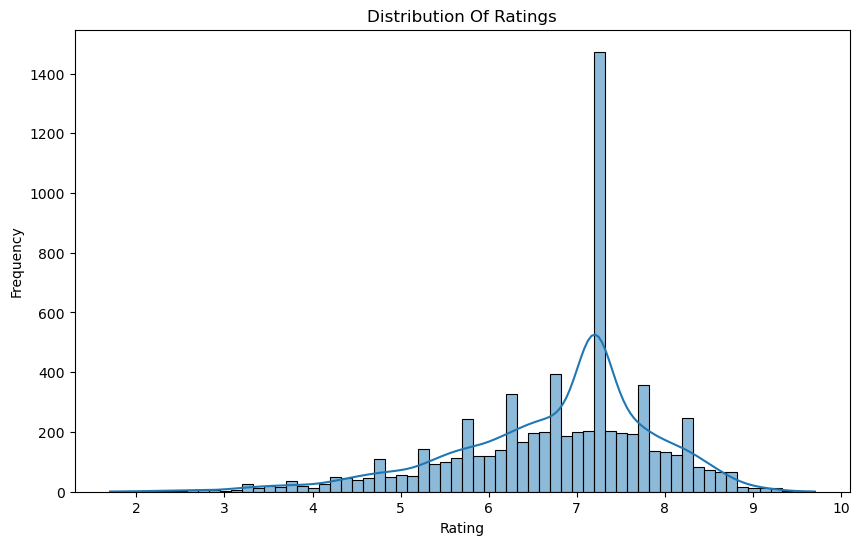

In [20]:
# Distribution of ratings 
plt.figure(figsize=(10, 6 ))
sns.histplot(data['rating'].dropna(), kde=True)
plt.title('Distribution Of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

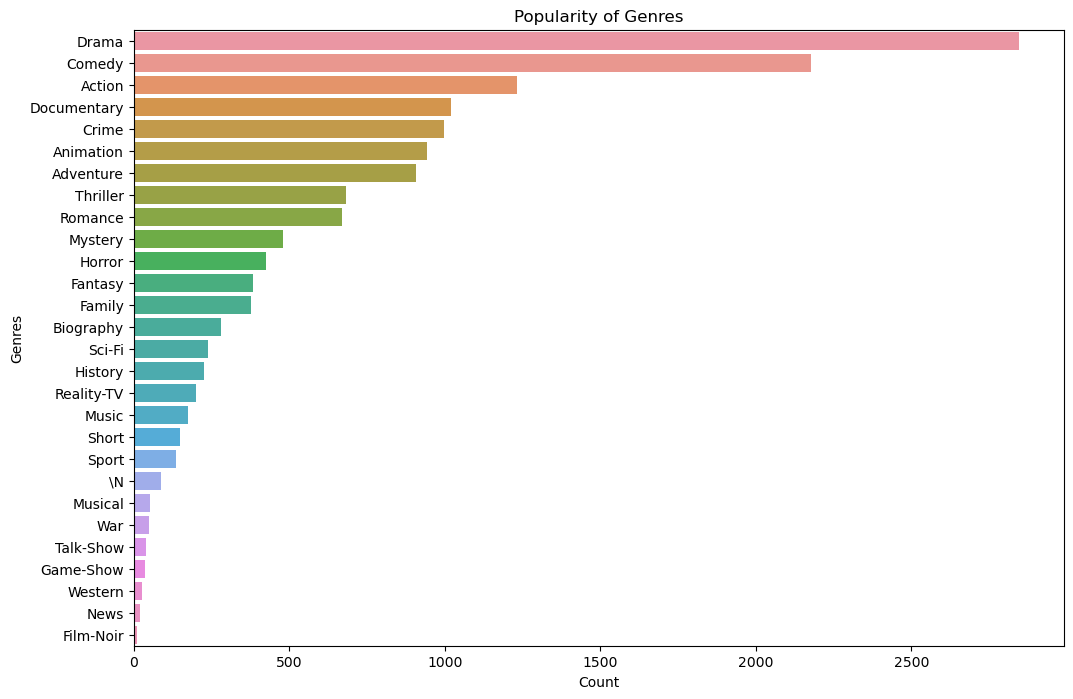

In [21]:
# Split genres into individual elements and explode the DataFrame
data['genres'] = data['genres'].str.split(',')
data_exploded = data.explode('genres')

# Now, plot the count plot again
plt.figure(figsize=(12,8))
sns.countplot(y='genres', data=data_exploded, order=data_exploded['genres'].value_counts().index)
plt.title('Popularity of Genres')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()


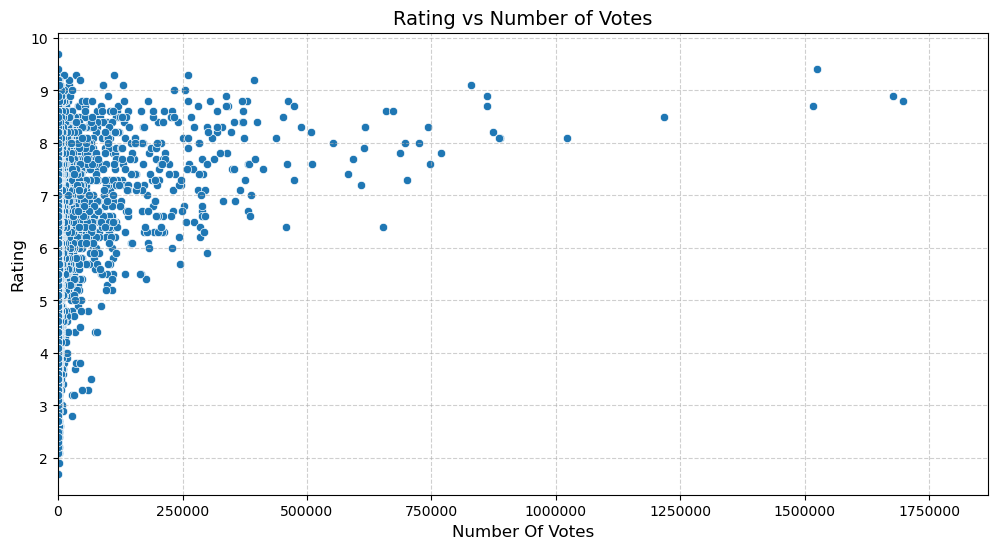

In [22]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='numVotes', y='rating', data=data)

# Adjust x-axis to scientific notation
plt.ticklabel_format(style='plain', axis='x')

# Set axis labels and title
plt.xlabel('Number Of Votes', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.title('Rating vs Number of Votes', fontsize=14)

# Set limits for better visualization (optional)
plt.xlim(0, data['numVotes'].max()*1.1)  
plt.ylim

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


C:\Users\chour\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chour\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


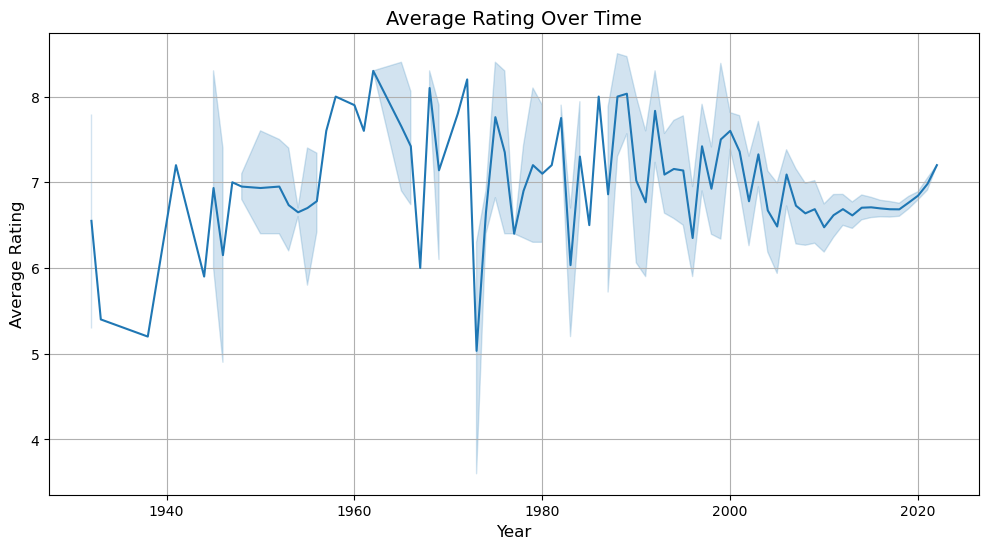

In [23]:
# Trends Over Time Average Rating By Year 
plt.figure(figsize=(12,6))
sns.lineplot(x="year", y="rating", data=data)
plt.title("Average Rating Over Time", fontsize=14)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Average Rating",fontsize=12)
plt.grid(True)
plt.show()
           

# 4.Encoding categorical  Variabels

In [25]:
label_encoder = LabelEncoder()
data['certificate'] = label_encoder.fit_transform(data['certificate'])

data_exploded['genres'] = label_encoder.fit_transform(data_exploded['genres'].astype(str))
data_encoded = data_exploded.groupby('imdb_id')['genres'].apply(list).reset_index()
# Merge back with the original data (if needed)
data = data.drop(columns=['genres']).merge(data_encoded, on='imdb_id')

data['language'] = label_encoder.fit_transform(data['language'])



# 5.Machine Learning: Predicting Ratings


In [27]:
# Deine X features and target values y
X = data[['certificate', 'year', 'episodes', 'runtime', 'numVotes', 'genres', 'is_ongoing']]
y = data["rating"]

In [28]:
#Split the data into training set and test set 
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.2 , random_state=42)

In [29]:
# Replace '\N' with NaN
X_train.replace('\\N', np.nan, inplace=True)
X_test.replace('\\N', np.nan, inplace=True)

# Convert the columns to numeric types (especially for 'runtime' and others)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Handle NaN values (you can choose to fill them or drop them)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Now you can standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\chour\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\chour\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\chour\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [30]:
imputer = SimpleImputer(strategy = "mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [36]:
# Model 1 Linear Regression 
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([6.8757634 , 6.71567809, 6.9813519 , ..., 6.80269288, 6.83719534,
       6.69228337])

In [42]:
# Model 2 Random Forest Regressor 
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([6.76 , 6.98 , 7.352, ..., 6.717, 5.525, 6.056])

In [58]:
def regression_accuracy(y_true, y_pred, threshold=0.1):
    # Calculate the percentage of predictions that fall within the given threshold of the true values
    accuracy = (abs(y_true - y_pred) <= threshold * abs(y_true)).mean()
    return accuracy

def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = regression_accuracy(y_test, y_pred)
    
    print(f'{model_name} Performance:')
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}')
    print(f'Accuracy Score: {accuracy:.2%}\n')

# Example usage:
evaluate_model(y_test, y_pred_lr, 'Linear Regression')
evaluate_model(y_test, y_pred_rf, 'Random Forest Regressor')
evaluate_model(y_test, y_pred_xgb, 'XGBoost Regressor')


Linear Regression Performance:
Mean Squared Error: 1.391543861217264
Mean Absolute Error: 0.8890285314852615
R^2 Score: -0.05522124728614286
Accuracy Score: 51.07%

Random Forest Regressor Performance:
Mean Squared Error: 1.1976944296096501
Mean Absolute Error: 0.7889118629230961
R^2 Score: 0.09177666252301042
Accuracy Score: 57.99%

XGBoost Regressor Performance:
Mean Squared Error: 1.2133228141418675
Mean Absolute Error: 0.8472237637991912
R^2 Score: 0.07992550649496533
Accuracy Score: 46.93%

